## HLS Color Threshold

Lets write a function that takes an image and threshold values and returns a binary output from applying the threshold to the S-channel and looks like this:

<img src = './img/hls-binary.jpg'/>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Read in the image
image = mpimg.imread('./img/test6.jpg')

# Define a function that thresholds the S-channel of HLS
# Try playing around with the hls and try different channels.

def hls_select(img, thresh=(0, 255)):
    # 1) Convert to HLS color space
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    # 2) Apply a threshold to the S channel
    s_channel = hls[:,:,2]
    # 3) Return a binary image of threshold result
    binary_output = np.zeros_like(s_channel)
    binary_output[(s_channel >= thresh[0]) & (s_channel <= thresh[1])] = 1
    return binary_output

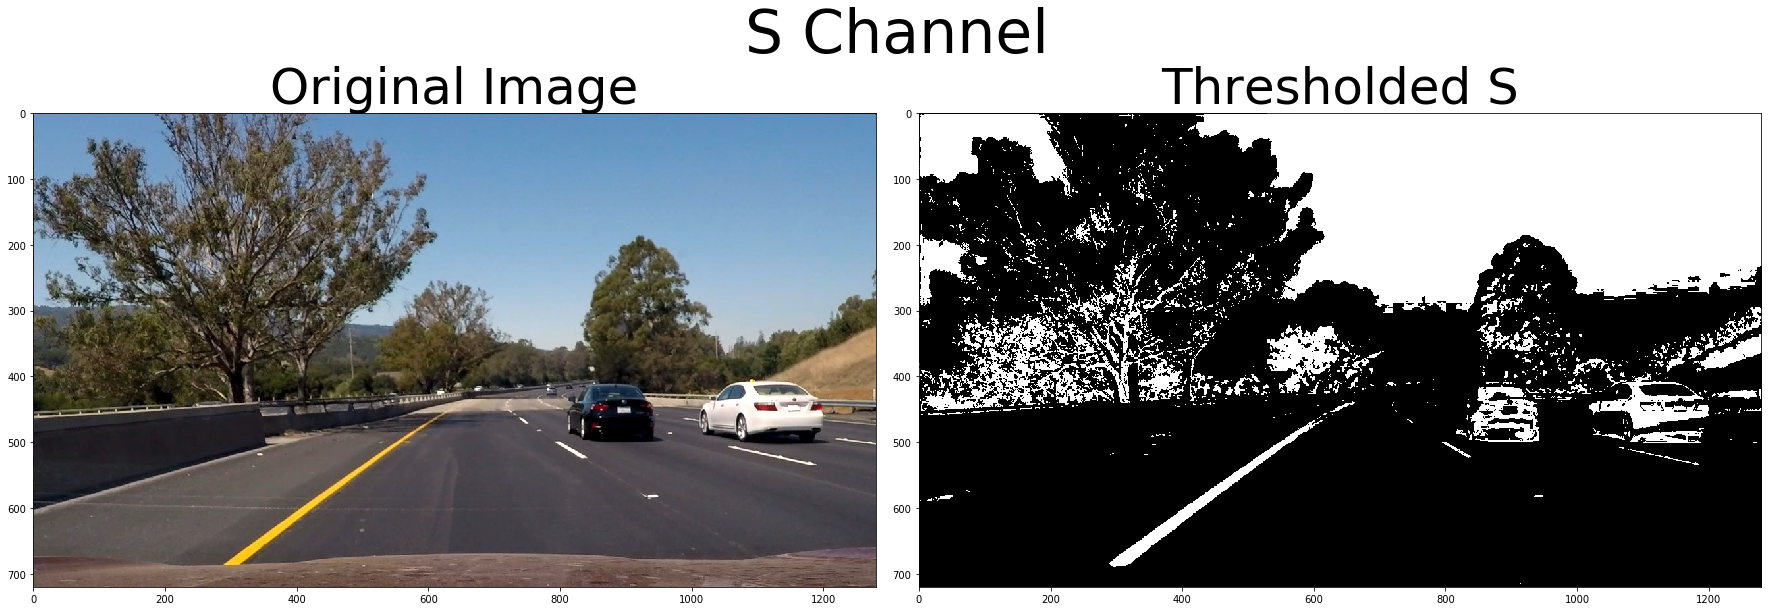

In [2]:
hls_binary = hls_select(image,thresh=(90,255))


# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(hls_binary, cmap='gray')
ax2.set_title('Thresholded S', fontsize=50)
f.suptitle('S Channel', fontsize = 60)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
f.savefig('./img/SChannel.jpg')